In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[3]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [14]:
%%time
'''
induce a grammar and train an estimator
'''
from graphlearn.graphlearn import GraphLearnSampler
training_graphs = get_graphs(dataset_fname, size=1000)
sampler=GraphLearnSampler(radius_list=[0,1],thickness_list=[3],
                          min_cip_count=2, min_interface_count=2)
sampler.fit(training_graphs,n_jobs=-1,batch_size=10)

/Library/Python/2.7/site-packages/sklearn/calibration.py:398: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/Library/Python/2.7/site-packages/sklearn/calibration.py:408: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/Library/Python/2.7/site-packages/sklearn/calibration.py:410: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


CPU times: user 27.2 s, sys: 2.57 s, total: 29.8 s
Wall time: 38.7 s


In [15]:
print('graph grammar stats:')
dataset_size, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances:%d  #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (dataset_size, interface_counts, core_counts, cip_counts))

graph grammar stats:
#instances:1000  #interfaces: 325   #cores: 73   #core-interface-pairs: 882


interface id: 519341 [17 options]


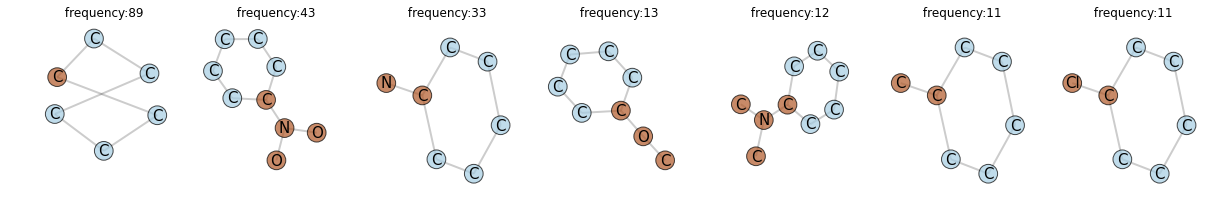

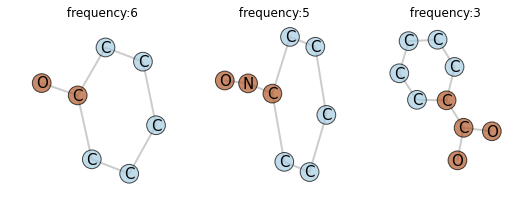

interface id: 156234 [17 options]


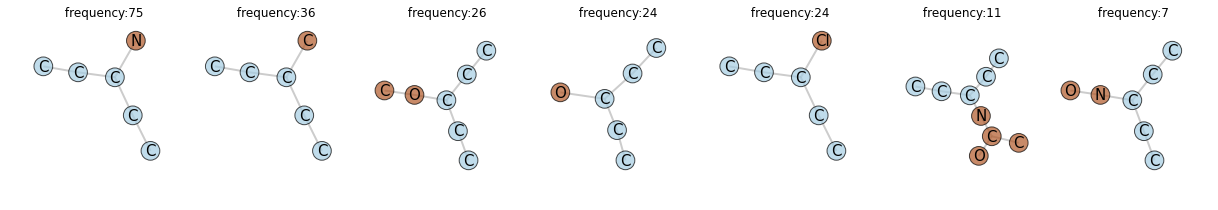

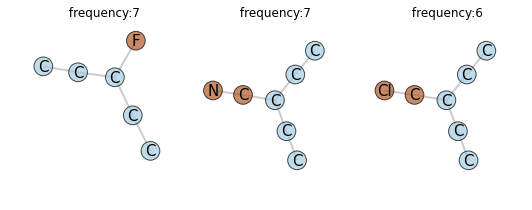

interface id: 571197 [11 options]


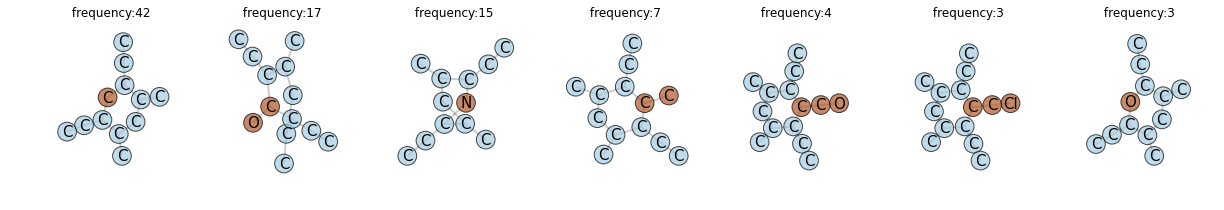

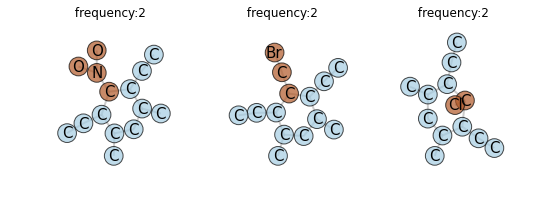

interface id: 430215 [9 options]


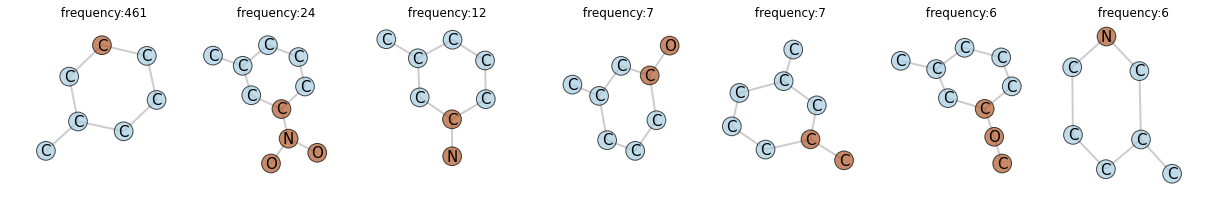

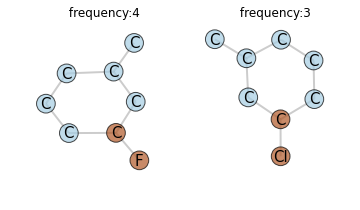

interface id: 620782 [8 options]


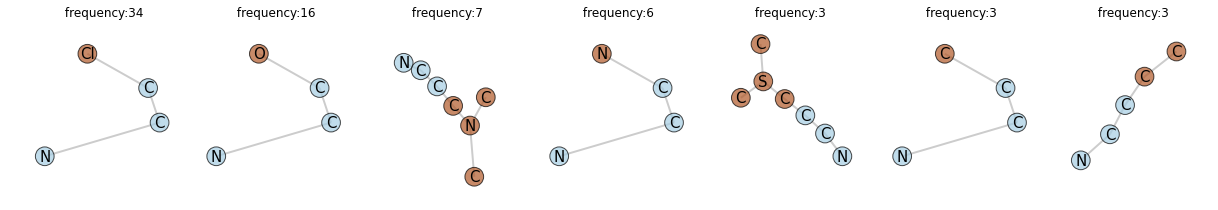

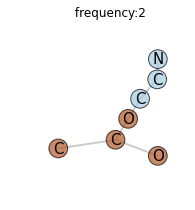

interface id: 885496 [7 options]


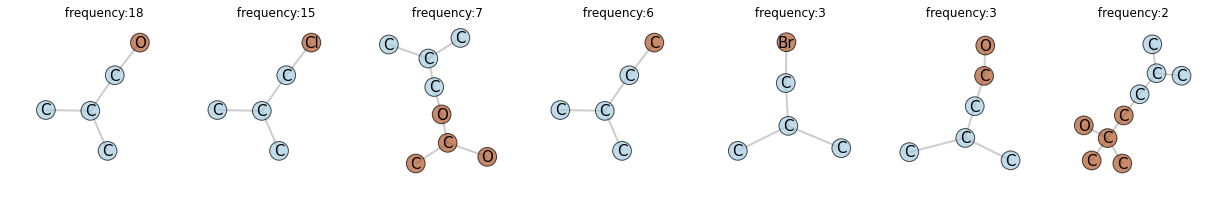

In [16]:
#draw production rules
from graphlearn.utils.draw import draw_grammar
draw_grammar(sampler.grammar().productions, contract=True,
             n_productions=6,n_graphs_per_line=7, 
             size=3, colormap='Paired', node_border=1, vertex_alpha=0.7, edge_alpha=0.2, node_size=350)

how often do we see interface hashes
# productions: 882
x = # interfaces (total: 325)
y=number of cores(ihash), y=sum Of Core Counts(ihash)


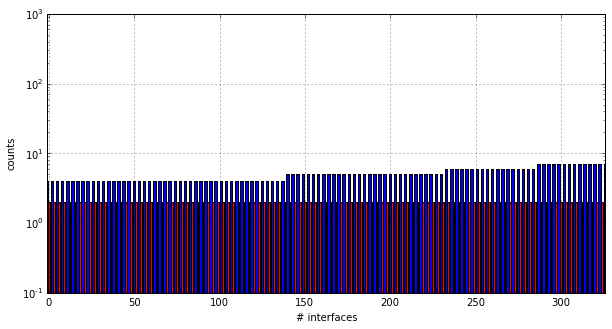

how often was this corehash seen?
x = # cores (total: 73)
y = in Y interfaces(chash), y= sum Of Count Over All Interfaces(chash)


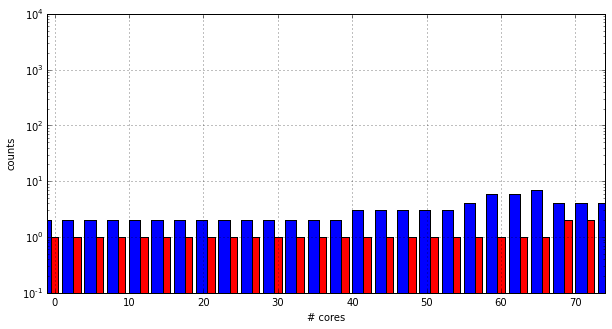

histogram
# productions: 882
distinct cores: 73 (seen on x axis)
interfaces with x many cores were observed y many times. 


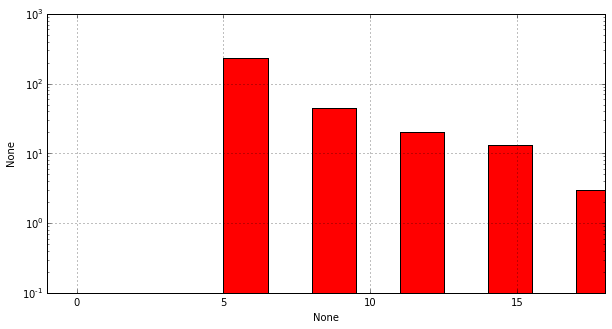

other histogram
how many cores exist with x many interfaces


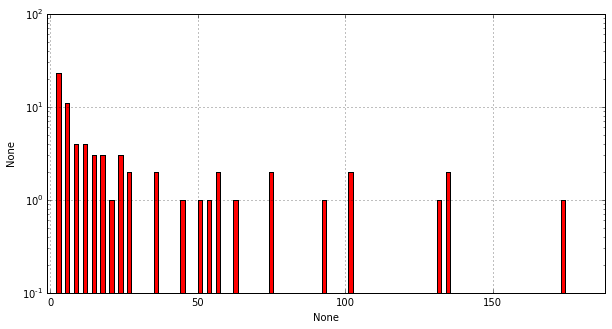

In [17]:
#grammar statistics
from graphlearn.utils.draw import draw_grammar_stats
draw_grammar_stats(sampler.grammar().productions, size=(10,5))

.